In [1]:
#this part is to load all embeddings and do the analysis
#of what types of nodes are identified wrong with the learning
#algorithms

import numpy as np
import pickle
import networkx as nx
from utils import run_embedding_classify_f1
from prettytable import PrettyTable
emb_location = './../generated_embedding/'
graph_location = './../data/'

In [2]:
#test run for one database
#running the f1_classification to train classifier and find out the nodes 
#which are wrongly predicted with 

emb_loc = emb_location+'citeseer.edges_deepwalk.embeddings'
run_embedding_classify_f1('citeseer',emb_loc,splits_ratio=[0.1])


with open('stats_citeseer.pickle','rb') as f_emb:
    emb1_indices,emb1_predict,emb1_label = pickle.load(f_emb)
    
f_emb.close()

print(emb1_indices.shape)
print(emb1_predict.shape)
print(emb1_label.shape)
print("\n\n")

g = nx.read_edgelist(graph_location+"citeseer.edges")

table1 = PrettyTable(['Serial No.','Node no.','True Label','Predicted Label','Degree'])
counter = 0
for i in range(len(emb1_indices)):
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        counter = counter + 1
        table1.add_row([counter,str(emb1_indices[i]),np.nonzero(emb1_label[i,:]),np.nonzero(emb1_predict[i,:]),g.degree(str(emb1_indices[i]))])
        
print(table1)

./../data/
file saved
Embedding dim: 128, graph: citeseer

Run number 1:
Train ratio: 0.9
micro: 0.5885885885885885
macro: 0.4798335584661983
samples: 0.5885885885885885
weighted: 0.5958909456077889
Accuracy: 0.5885885885885885

(333,)
(333, 7)
(333, 7)



+------------+----------+---------------+-----------------+--------+
| Serial No. | Node no. |   True Label  | Predicted Label | Degree |
+------------+----------+---------------+-----------------+--------+
|     1      |   2168   | (array([6]),) |  (array([4]),)  |   1    |
|     2      |   2878   | (array([5]),) |  (array([6]),)  |   2    |
|     3      |   1739   | (array([5]),) |  (array([1]),)  |   1    |
|     4      |   2698   | (array([2]),) |  (array([4]),)  |   2    |
|     5      |   1771   | (array([3]),) |  (array([5]),)  |   1    |
|     6      |   461    | (array([3]),) |  (array([1]),)  |   2    |
|     7      |   2209   | (array([2]),) |  (array([5]),)  |   1    |
|     8      |   3233   | (array([6]),) |  (array([2]

In [3]:
#to count number of wrongly classified nodes
counts = dict()
for i in range(len(emb1_indices)):
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        degree = g.degree(str(emb1_indices[i]))
        counts[degree] = counts.get(degree,0)+1
        
#for total number of nodes
counts_total = dict()
for i in range(len(emb1_indices)):
    degree = g.degree(str(emb1_indices[i]))
    counts_total[degree] = counts_total.get(degree,0)+1
    
    
    
for i in sorted(counts.keys()):
    print("for degree "+str(i)+" total: "+str(counts_total[i])+" and wrong prediction: "+ str(counts[i])+"("+str(int(counts[i]/counts_total[i]*100))+"%)")

for degree 1 total: 127 and wrong prediction: 67(52%)
for degree 2 total: 92 and wrong prediction: 35(38%)
for degree 3 total: 45 and wrong prediction: 14(31%)
for degree 4 total: 30 and wrong prediction: 8(26%)
for degree 5 total: 10 and wrong prediction: 5(50%)
for degree 6 total: 5 and wrong prediction: 2(40%)
for degree 7 total: 11 and wrong prediction: 3(27%)
for degree 9 total: 3 and wrong prediction: 1(33%)
for degree 10 total: 2 and wrong prediction: 1(50%)
for degree 12 total: 2 and wrong prediction: 1(50%)


In [4]:
#writing the above code as function to take input and show the results

datasets = ['cora','blogcatalog']

def network_analysis(dataset):
    emb_loc = emb_location+dataset+'.edges_deepwalk.embeddings'
    run_embedding_classify_f1(dataset,emb_loc,splits_ratio=[0.1])

    pickle_file = 'stats_'+dataset+'.pickle'
    with open(pickle_file,'rb') as f_emb:
        emb1_indices,emb1_predict,emb1_label = pickle.load(f_emb)
    
    f_emb.close()

    print(emb1_indices.shape)
    print(emb1_predict.shape)
    print(emb1_label.shape)
    print("\n\n")

    g = nx.read_edgelist(graph_location+"citeseer.edges")
    
    #to count number of wrongly classified nodes
    counts = dict()
    for i in range(len(emb1_indices)):
        if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
            degree = g.degree(str(emb1_indices[i]))
            counts[degree] = counts.get(degree,0)+1
        
    #for total number of nodes
    counts_total = dict()
    for i in range(len(emb1_indices)):
        degree = g.degree(str(emb1_indices[i]))
        counts_total[degree] = counts_total.get(degree,0)+1
    
    print(f"Statistics for dataset: {dataset}")
    print("---------------------------------")
    
    for i in sorted(counts.keys()):
        print("for degree "+str(i)+" total: "+str(counts_total[i])+" and wrong prediction: "+ str(counts[i])+"("+str(int(counts[i]/counts_total[i]*100))+"%)")
    return None

        
for dataset in datasets:
    network_analysis(dataset)

file saved
Embedding dim: 128, graph: cora

Run number 1:
Train ratio: 0.9
micro: 0.8376383763837638
macro: 0.8230022432436838
samples: 0.8376383763837638
weighted: 0.8347950399963107
Accuracy: 0.8376383763837638

(271,)
(271, 7)
(271, 7)



Statistics for dataset: cora
---------------------------------
for degree 1 total: 96 and wrong prediction: 16(16%)
for degree 2 total: 69 and wrong prediction: 15(21%)
for degree 3 total: 41 and wrong prediction: 4(9%)
for degree 4 total: 17 and wrong prediction: 3(17%)
for degree 5 total: 15 and wrong prediction: 1(6%)
for degree 9 total: 2 and wrong prediction: 1(50%)
for degree 11 total: 1 and wrong prediction: 1(100%)
for degree 15 total: 3 and wrong prediction: 1(33%)
for degree 23 total: 1 and wrong prediction: 1(100%)
for degree 27 total: 1 and wrong prediction: 1(100%)


/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


file saved
Embedding dim: 128, graph: blogcatalog

Run number 1:
Train ratio: 0.9
micro: 0.40735694822888285
macro: 0.2638632029510274
samples: 0.3959302325581396
weighted: 0.43920250757323276
Accuracy: 0.3168604651162791

(1032,)
(1032, 39)
(1032, 39)



Statistics for dataset: blogcatalog
---------------------------------


TypeError: '<' not supported between instances of 'DegreeView' and 'int'

In [1]:
#next part is to visualise the graph and check which nodes are not classified accurately
#graph can be divided into three sections: traning, predicted_right and predicted_wrong



/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: libiconv.so.2: cannot open shared object file: No such file or directory
  warnings.warn(msg, RuntimeWarning)


CPU times: user 51.9 s, sys: 1.46 s, total: 53.4 s
Wall time: 13.4 s


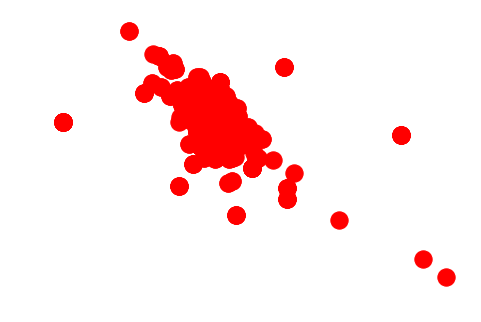

In [6]:
#this is graph_layout by networkx
%time nx.draw(g,pos=nx.spectral_layout(g))


In [7]:
#now plotting using graph_tool
import matplotlib
%matplotlib inline
from graph_tool.all import *


/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: libiconv.so.2: cannot open shared object file: No such file or directory
  warnings.warn(msg, RuntimeWarning)


In [12]:
gt = Graph()
gt = graph_tool.load_graph_from_csv(graph_location+'citeseer.edges',csv_options={'delimiter':' '})
#graph_tool.draw.graphviz_draw(gt,pos=graph_tool.draw.(gt))

In [13]:
graph_tool.draw.fruchterman_reingold_layout(gt,n_iter=100)

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8c2aca5128, at 0x7f8c2aca5940>